Thinkful Bootcamp Course

Author: Ian Heaton

Email: iheaton@gmail.com

Mentor: Nemanja Radojkovic

Date: 2017/02/28


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import scipy.stats as stats
import stats_toolbox as st

sb.set_style('darkgrid')

# The European Social Survey (ESS)

Using selected questions from the 2012 and 2014 editions of the European Social Survey, questions concerning people’s level of trust, fairness of others and happiness will be assessed.

In [44]:
survey_data = pd.read_csv('/media/ianh/space/ThinkfulData/EuropeanSocialSurvey/ESSdata_Thinkful_1.4.8.csv')
print('Data set has %d rows and %d columns' % (survey_data.shape[0], survey_data.shape[1]))

Data set has 8594 rows and 13 columns


In [5]:
def translate_date_field(value):
    if value == 7:
        return 2014
    elif value == 6:
        return 2012
     
survey_data['year'] = survey_data['year'].apply(translate_date_field)

## 1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

In [6]:
# Decompose data frame into smaller data structure one for each one of the 5 countries.
Switzerland_Data = survey_data[survey_data['cntry'] == 'CH']
CzechRepublic_Data = survey_data[survey_data['cntry'] == 'CZ']
Spain_Data = survey_data[survey_data['cntry'] == 'ES']
Norway_Data = survey_data[survey_data['cntry'] == 'NO']
Sweden_Data = survey_data[survey_data['cntry'] == 'SE']
Germany_Data = survey_data[survey_data['cntry'] == 'DE']

### Switzerland

First we will look at the number of survey responses, to see if we have roughly equal numbers for the two years.

   year  cntry  idno  tvtot  ppltrst  pplfair  pplhlp  happy  sclmeet  sclact  \
0  2012    773   773    772      773      770     771    770      770     762   
1  2014    773   773    773      773      773     773    773      772     765   

   gndr  agea  partner  
0   773   752      773  
1   773   751      773  


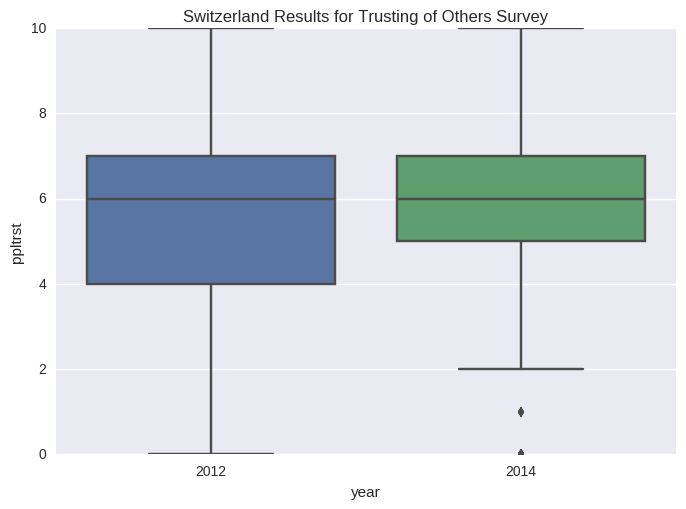

In [27]:
grpby = Switzerland_Data.groupby(['year'], as_index=False)
print(grpby.count())
# Create box plot of Trust survey results to visualize the different countries’ median.
sb.boxplot(y="ppltrst", x="year", data=Switzerland_Data)
sb.plt.title('Switzerland Results for Trusting of Others Survey')
plt.show()

From the above box plot it appears that their is little difference between the two years.  The first quartile is higher for the 2015 at 5.  
Since we are working with data that is ordinal we will perform the Kruskal- Wallace Test to look for significant differences between the median of the two years. Because the data is ordinal it does not make sense to use the mean.

In [22]:
# Determining if there is a significant difference in how those surveyed from Switzerland
# trust others between 2012 and 2014
stats.kruskal(Switzerland_Data.query('year == 2012').ppltrst,
              Switzerland_Data.query('year == 2014').ppltrst)


KruskalResult(statistic=0.30163599644480188, pvalue=0.58285861114420479)

### Czech Republic

   year  cntry  idno  tvtot  ppltrst  pplfair  pplhlp  happy  sclmeet  sclact  \
0  2012    658   658    653      651      649     654    646      655     644   
1  2014    658   658    658      657      658     657    652      655     650   

   gndr  agea  partner  
0   658   639      656  
1   648   641      652  


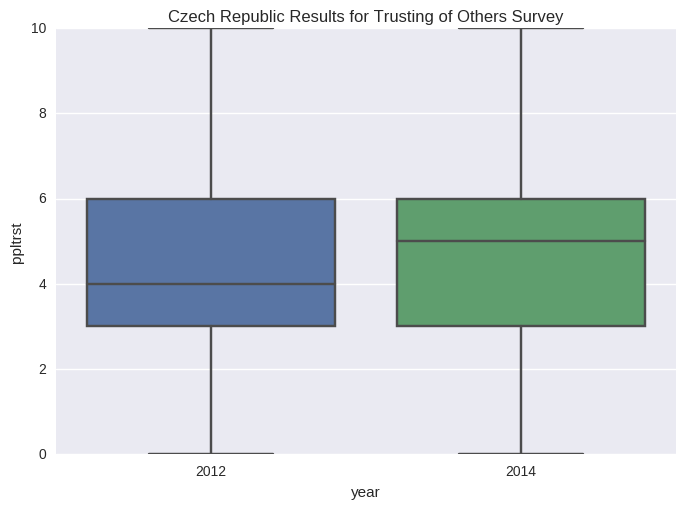

In [30]:
grpby = CzechRepublic_Data.groupby(['year'], as_index=False)
print(grpby.count())
sb.boxplot(y="ppltrst", x="year", data=CzechRepublic_Data)
sb.plt.title('Czech Republic Results for Trusting of Others Survey')
plt.show()

Between the two years there is an increase in the median yet the first and third quartiles remain the same. 

In [25]:
# Determining if there is a significant difference in how those surveyed from the Czech Republic
# trust others between 2012 and 2014
stats.kruskal(CzechRepublic_Data.query('year == 2012').ppltrst,
              CzechRepublic_Data.query('year == 2014').ppltrst, nan_policy='omit')

KruskalResult(statistic=0.72115913853012281, pvalue=0.39576395374563522)

### Spain 

   year  cntry  idno  tvtot  ppltrst  pplfair  pplhlp  happy  sclmeet  sclact  \
0  2012   1213  1213   1213     1213     1211    1208   1212     1211    1203   
1  2014   1213  1213   1212     1211     1199    1209   1212     1211    1185   

   gndr  agea  partner  
0  1213  1178     1210  
1  1213  1182     1210  


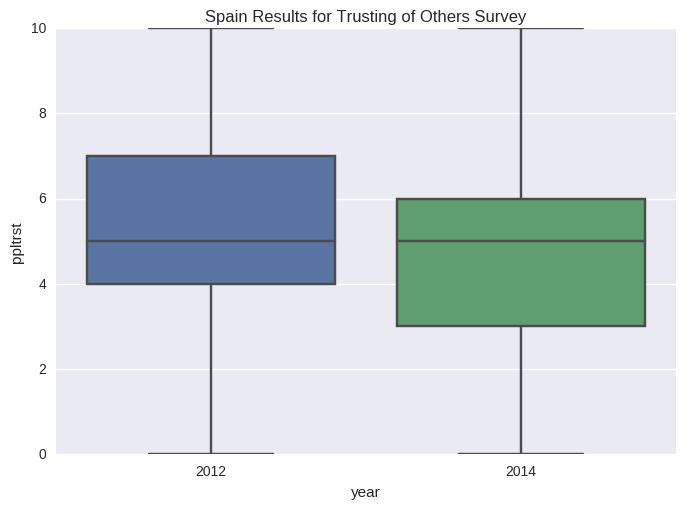

In [31]:
grpby = Spain_Data.groupby(['year'], as_index=False)
print(grpby.count())
sb.boxplot(y="ppltrst", x="year", data=Spain_Data)
sb.plt.title('Spain Results for Trusting of Others Survey')
plt.show()

In [32]:
# Determining if there is a significant difference in how those surveyed from Spain
# trust others between 2012 and 2014
stats.kruskal(Spain_Data.query('year == 2012').ppltrst,
              Spain_Data.query('year == 2014').ppltrst, nan_policy='omit')

KruskalResult(statistic=8.216087354735361, pvalue=0.0041520627675982)

There is a significant difference in the two years for the Spanish data, surprising considering the above box plots.
Lets look at the number of missing values for each year, perhaps this creates a small sample size which could result in high variability. 

In [34]:
Spain_Data.query('year == 2012').ppltrst.isnull().sum()
Spain_Data.query('year == 2014').ppltrst.isnull().sum()

2

### Norway

   year  cntry  idno  tvtot  ppltrst  pplfair  pplhlp  happy  sclmeet  sclact  \
0  2012    731   731    731      730      729     729    727      731     726   
1  2014    731   731    731      730      729     728    731      731     731   

   gndr  agea  partner  
0   731   718      729  
1   731   718      730  


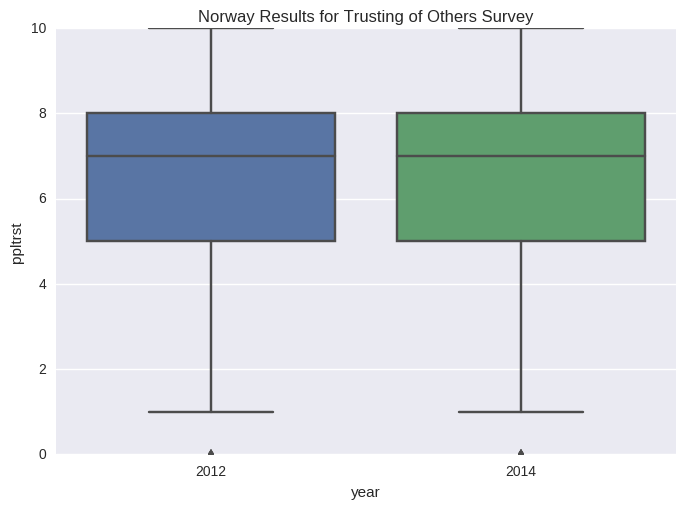

In [35]:
grpby = Norway_Data.groupby(['year'], as_index=False)
print(grpby.count())
sb.boxplot(y="ppltrst", x="year", data=Norway_Data)
sb.plt.title('Norway Results for Trusting of Others Survey')
plt.show()

The distributions of the two years for Norway appear to be identical.

In [37]:
# Determining if there is a significant difference in how those surveyed from Norway
# trust others between 2012 and 2014
stats.kruskal(Norway_Data.query('year == 2012').ppltrst,
              Norway_Data.query('year == 2014').ppltrst, nan_policy='omit')

KruskalResult(statistic=0.24473874253133701, pvalue=0.62080430049698654)

### Sweden

   year  cntry  idno  tvtot  ppltrst  pplfair  pplhlp  happy  sclmeet  sclact  \
0  2012    908   908    908      906      905     907    907      907     902   
1  2014    908   908    907      908      905     906    905      908     904   

   gndr  agea  partner  
0   908   870      908  
1   908   878      908  


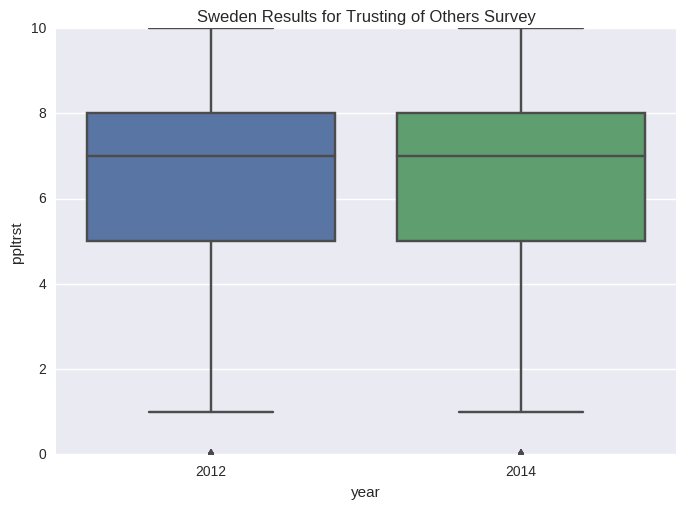

In [41]:
grpby = Sweden_Data.groupby(['year'], as_index=False)
print(grpby.count())
sb.boxplot(y="ppltrst", x="year", data=Sweden_Data)
sb.plt.title('Sweden Results for Trusting of Others Survey')
plt.show()

Like Norway, there is no change in the distribution for the results of the Trustworthiness of others survey between the two years. 

In [39]:
# Determining if there is a significant difference in those surveyed from Sweden
# trust others between 2012 and 2014
stats.kruskal(Sweden_Data.query('year == 2012').ppltrst,
              Sweden_Data.query('year == 2014').ppltrst, nan_policy='omit')

KruskalResult(statistic=4.2412547110440508, pvalue=0.03945299959307013)

In [40]:
print(Sweden_Data.query('year == 2012').ppltrst.isnull().sum())
print(Sweden_Data.query('year == 2014').ppltrst.isnull().sum())

2
0


### Germany

   year  cntry  idno  tvtot  ppltrst  pplfair  pplhlp  happy  sclmeet  sclact  \
0  2012     14    14     14       14       13      13     14       14      14   
1  2014     14    14     14       14       14      14     14       14      14   

   gndr  agea  partner  
0    14    14       14  
1    14    14       14  


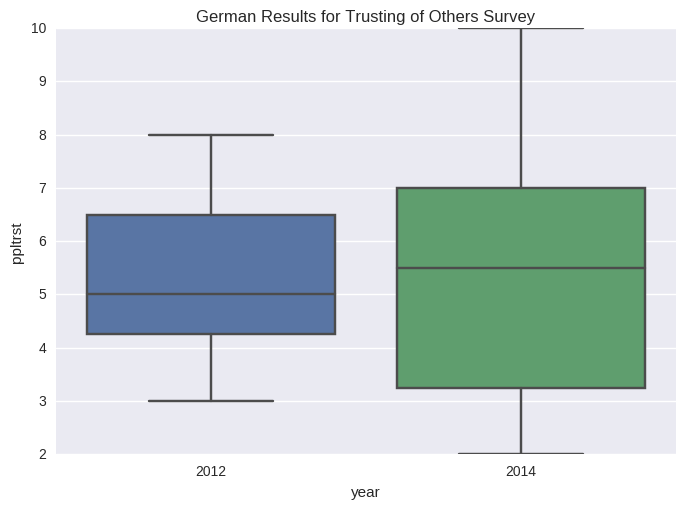

In [42]:
grpby = Germany_Data.groupby(['year'], as_index=False)
print(grpby.count())
sb.boxplot(y="ppltrst", x="year", data=Germany_Data)
sb.plt.title('German Results for Trusting of Others Survey')
plt.show()

The range of responses is greater in 2014.  Not much can be said about the population as a whole with only 14 individuals surveyed in each of the two years. 

In [43]:
# Determining if there is a significant difference in those surveyed from Germany
# trust others between 2012 and 2014
stats.kruskal(Germany_Data.query('year == 2012').ppltrst,
              Germany_Data.query('year == 2014').ppltrst, nan_policy='omit')

KruskalResult(statistic=0.03493591039585809, pvalue=0.85173001912501989)